# Kelompok 4
Nama Anggota :
- Abigail Tesalonika William 
- Jeanet Wynne W. Kastilong 
- Maria Stefany Phileina F. Samosir 
- Zefanya Febrina Valentine Mehe

Judul Penelitian : SENTIMENT ANALYSIS OF AMAZON REVIEWS USING NAIVE BAYES ALGORITHM
Tujuan Penelitian : Mengetahui bagaimana cara melakukan analisis sentimen pada ulasan produk di Amazon menggunakan metode machine learning serta rekomendasi untuk meningkatkan kualitas analisis sentimen pada ulasan produk di Amazon


# Dataset
Deskripsi Dataset : Ini adalah daftar lebih dari 34.000 ulasan konsumen untuk produk Amazon seperti Kindle, Fire TV Stick, dan lainnya yang disediakan oleh Database Produk Datafiniti . Kumpulan data mencakup informasi produk dasar, peringkat, teks ulasan, dan lainnya untuk setiap produk.

Sumber Dataset : https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import random

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
amazon = pd.read_csv("amazon.csv")
amazon.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

# Exploratory Data Analysis Process

In [4]:
review = amazon[["reviews.text", "reviews.rating"]].sample(10000, random_state=23)
review.head()

,reviews.text,reviews.rating
21536,Bought as a Mother's Day Gift. This is great f...,4.0
20669,I can hold this next to my Kindle Paperwhite a...,5.0
30656,Love this device and went on to buy 2 as gifts...,5.0
25297,"With some technical savvy, you can quickly hav...",5.0
9016,bought for grandkids they love them. wise choi...,5.0


In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 21536 to 29020
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    10000 non-null  object 
 1   reviews.rating  9993 non-null   float64
dtypes: float64(1), object(1)
memory usage: 234.4+ KB


In [6]:
review.dropna(inplace=True)
review.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

# Distribution of Rating

In [7]:
review['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    6891
4.0    2455
3.0     420
2.0     120
1.0     107
Name: reviews.rating, dtype: int64

In [8]:
review5 = review[review['reviews.rating']==5].sample(150,random_state=43)
review4 = review[review['reviews.rating']==4].sample(150,random_state=43)
review3 = review[review['reviews.rating']==3].sample(150,random_state=43)
review2 = review[review['reviews.rating']==2].sample(100,random_state=43)
review1 = review[review['reviews.rating']==1].sample(100,random_state=43)

review = pd.concat([review5,review4,review3,review2,review1])

In [9]:
review['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    150
4.0    150
3.0    150
2.0    100
1.0    100
Name: reviews.rating, dtype: int64

In [10]:
sentiment_score = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1}
sentiment = {0: 'Negative', 1: 'Positive'}

review['sentiment_score'] = review['reviews.rating'].map(sentiment_score)
review['sentiment'] = review['sentiment_score'].map(sentiment)

In [11]:
review['sentiment_score'].value_counts()

1    450
0    200
Name: sentiment_score, dtype: int64

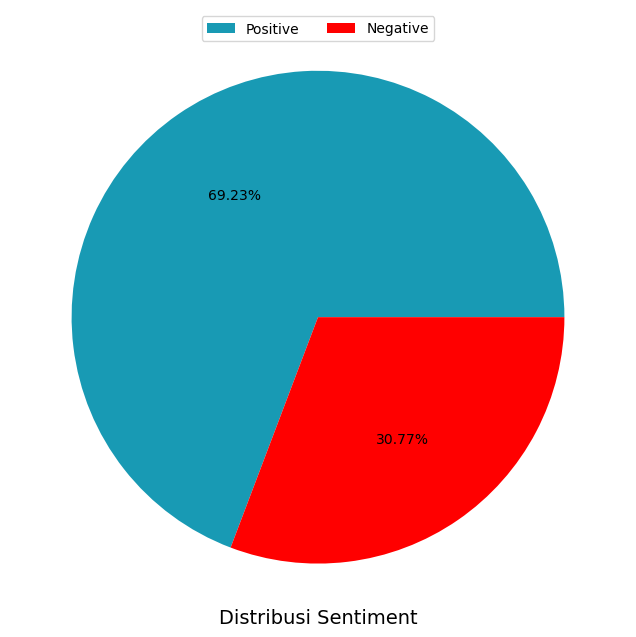

In [12]:
plt.figure(figsize=(8, 8))
labels = ['Positive', 'Negative']
colors = ['#189AB4', '#FF0000']
plt.pie(review['sentiment'].value_counts(), autopct='%0.2f%%', colors=colors)
plt.title('Distribusi Sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

# Mari kita melihat kata-kata yang paling banyak digunakan

In [13]:
all_words = pd.Series(' '.join(review['reviews.text']).split())

Kata Umum

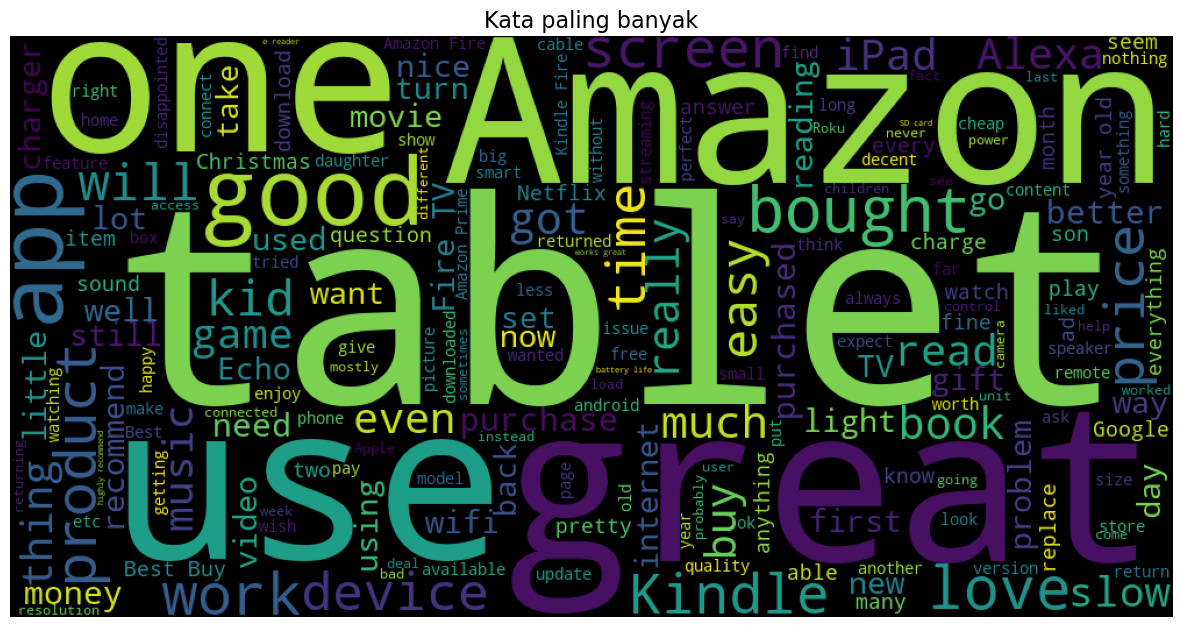

In [14]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Kata paling banyak", size=16)

plt.axis("off")
plt.show()

Kata Positive

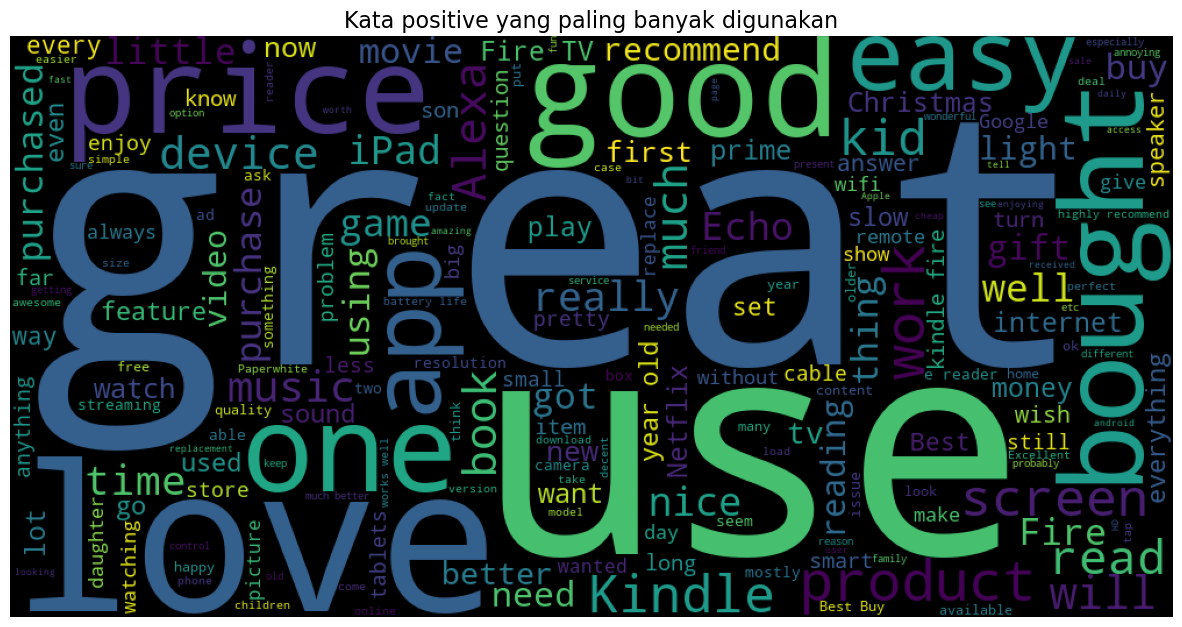

In [15]:
positiveWords = pd.Series(' '.join(review[review['sentiment'] == 'Positive']['reviews.text']).split())
additional_stopwords = ['tablet', 'amazon']
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS.union(additional_stopwords))).generate(' '.join(positiveWords))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.title("Kata positive yang paling banyak digunakan", size=16)
plt.axis("off")
plt.show()

Kata Negative

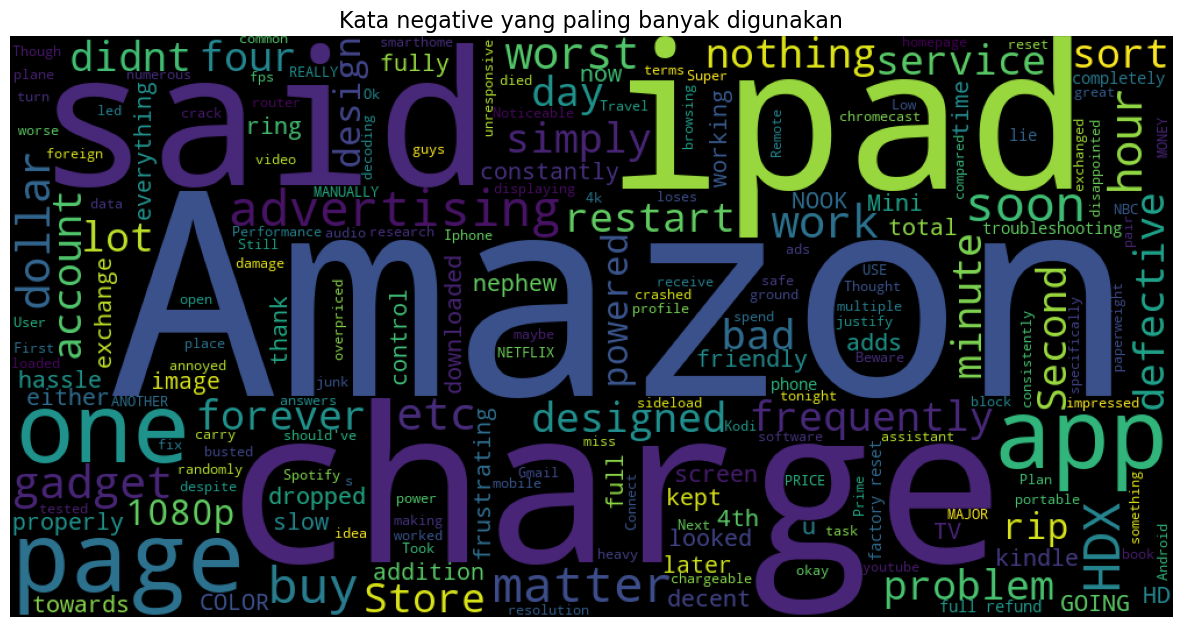

In [16]:
negativeWords = pd.Series(' '.join(review[review['sentiment'] == 'Negative']['reviews.text']).split())
additional_stopwords = ['tablet', 'sat', 'back', 'frame', 'charger', 'registered', 'wifi', 'changed', 'hbo', 'ad', 'hoping', 'freeze']
negative_words = negativeWords[~negativeWords.isin(positiveWords)]
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS.union(additional_stopwords))).generate(' '.join(negative_words))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.title("Kata negative yang paling banyak digunakan", size=16)
plt.axis("off")
plt.show()

# Text Cleaning 

Kami akan membersihkan teks agar dapat:

- membuat semua huruf menjadi huruf kecil
- menghapus spasi putih
- menghapus tag HTML
- mengganti angka dengan spasi
- mengganti tanda baca dengan spasi
- menghapus spasi dan tab tambahan

In [17]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = text.strip()
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    return text

# Removing Stopwords

Beberapa kata dalam ulasan mungkin tidak memberikan kontribusi yang banyak terhadap makna keseluruhan kalimat. Kata-kata tersebut mungkin termasuk "a, an, the" dan sebagainya. Kata-kata inilah yang disebut sebagai stopwords dan kita akan membuangnya

In [18]:
def remove_stopwords(text):
    text = str(text)
    filtered_sentence = []
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    return text

Stemming adalah sistem berbasis aturan untuk mengubah kata-kata menjadi bentuk akar mereka. Ini menghapus akhiran dari kata-kata. Hal ini membantu meningkatkan kemiripan (jika ada) antara kalimat-kalimat. Contohnya adalah "jumped" / "jumping" menjadi "jump"

In [19]:
def apply_stemming(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    text = " ".join(stemmed_words)
    return text

Sekarang kita akan mengetesnya dengan kalimat dibawah berikut ini.

In [20]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print("Original Text:")
print(text, '\n')

Original Text:
   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



In [21]:
text = clean_text(text)
print("Cleaned Text:")
print(text, '\n')

Cleaned Text:
this is a message to be cleaned it may involve some things like adjacent spaces and tabs 



In [22]:
text = remove_stopwords(text)
print("Text after Stopword Removal:")
print(text, '\n')

Text after Stopword Removal:
message be cleaned may involve some things like adjacent spaces tabs 



# Testing Stemming Word

In [23]:
text = apply_stemming(text)
print("Text after Stemming:")
print(text)

Text after Stemming:
messag be clean may involv some thing like adjac space tab


**Lemmatizing**
Jika kita tidak puas dengan hasil stemming, kita dapat menggunakan Lemmatization sebagai gantinya. Biasanya, ini membutuhkan lebih banyak waktu, tetapi memberikan hasil yang lebih baik. Lemmatization memerlukan pengetahuan tentang tag posisi kata yang benar seperti "Noun", "Verb", "Adjective", dll. dan kita akan menggunakan fungsi NLTK lainnya untuk memberikan informasi ini kepada lemmatizer.

In [24]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
def lemmatize(text:str):
    
    text = str(text)
    
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [26]:
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)

lemmatize(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be clean may involve some thing like adjacent space tabs'

In [27]:
# clean text
review['text'] = review['reviews.text'].apply(clean_text)
# remove stopwords
review['text'] = review['text'].apply(remove_stopwords)
# lemmatize
review['text'] = review['text'].apply(lemmatize)

In [28]:
i = random.choice(range(len(review)))

print(f"Original review: \n{review['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{review['text'].iloc[i]}")

Original review: 
Not very user friendly. A bit slow & heavy. Burned out pixel right out of box. Noticeable but not bothersome. Still like my iPad after trying fire.

Processed review: 
not very user friendly bit slow heavy burn out pixel right out of box noticeable but not bothersome still like my ipad after try fire


# Dataset Yang Sudah Bersih

Convert to csv

In [29]:
# export cleaned data to csv
review.to_csv('cleaned_review.csv', index=False)

Import dataset

In [30]:
clean_review = pd.read_csv('cleaned_review.csv')
clean_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     650 non-null    object 
 1   reviews.rating   650 non-null    float64
 2   sentiment_score  650 non-null    int64  
 3   sentiment        650 non-null    object 
 4   text             650 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 25.5+ KB


In [31]:
clean_review[clean_review['text'].isnull()]
clean_review

,reviews.text,reviews.rating,sentiment_score,sentiment,text
0,"The product was easy to set up, and is easy to...",5.0,1,Positive,product be easy set up easy use i love hand free
1,I came in to Best Buy to get a game for my BF ...,5.0,1,Positive,i come in best buy get game for my bf end up w...
2,Bought this for my toddler and teen they both ...,5.0,1,Positive,bought for my toddler teen they both love
3,The product works great. If you need help usin...,5.0,1,Positive,product work great if you need help use just l...
4,It may be cheap but this is a great tablet and...,5.0,1,Positive,may be cheap but great tablet work awesome
...,...,...,...,...,...
645,So I was already not too pleased with Amazon's...,1.0,0,Negative,so i be already not too pleased with amazon s ...
646,We started out great. We had a great thing goi...,1.0,0,Negative,we start out great we have great thing go i lo...
647,Pretty dumb that you have to.buy a charger port,1.0,0,Negative,pretty dumb you have buy charger port
648,"I HATE this machine. First, I specifically ask...",1.0,0,Negative,i hate machine first i specifically ask salesp...


In [32]:
clean_review.dropna(inplace=True)
clean_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     650 non-null    object 
 1   reviews.rating   650 non-null    float64
 2   sentiment_score  650 non-null    int64  
 3   sentiment        650 non-null    object 
 4   text             650 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 25.5+ KB


Visualisasi kata-kata yang paling banyak digunakan

In [33]:
all_words = pd.Series(' '.join(clean_review['reviews.text']).split())

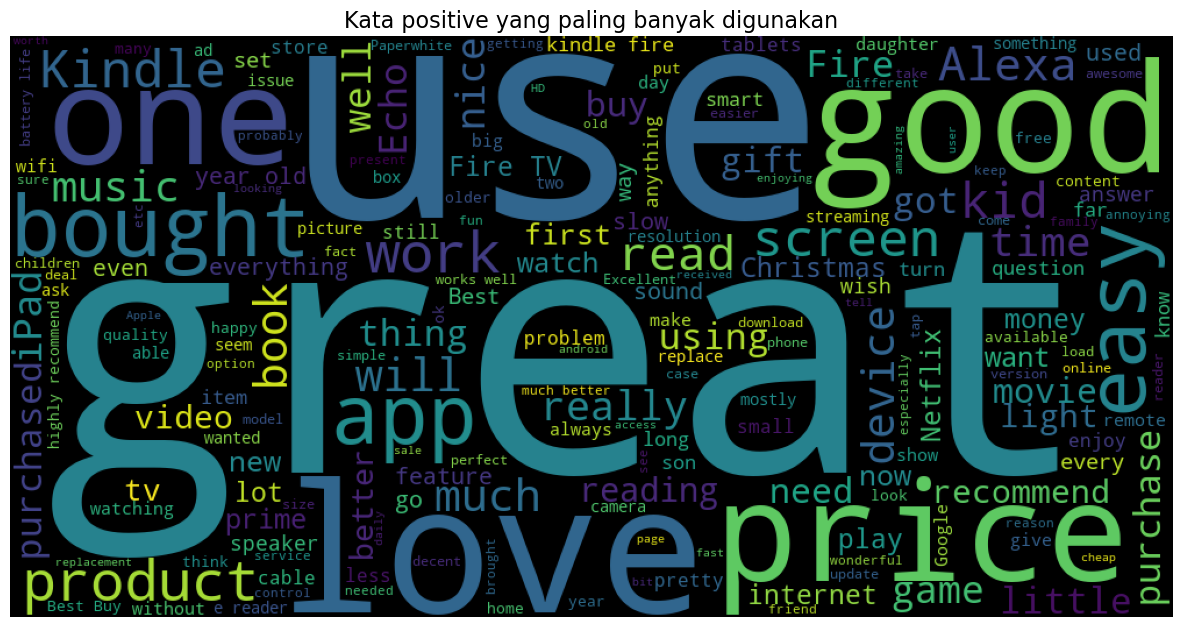

In [34]:
positiveWords = pd.Series(' '.join(clean_review[clean_review['sentiment'] == 'Positive']['reviews.text']).split())
additional_stopwords = ['tablet', 'amazon']
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS.union(additional_stopwords))).generate(' '.join(positiveWords))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.title("Kata positive yang paling banyak digunakan", size=16)
plt.axis("off")
plt.show()

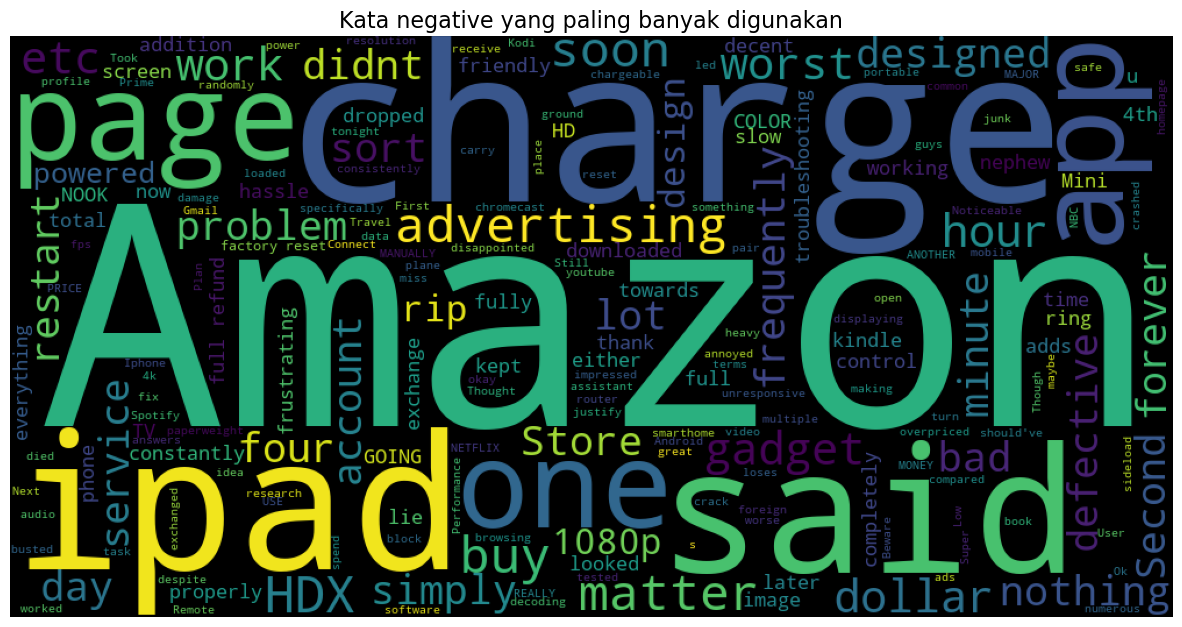

In [35]:
negativeWords = pd.Series(' '.join(clean_review[clean_review['sentiment'] == 'Negative']['reviews.text']).split())
additional_stopwords = ['tablet', 'sat', 'back', 'frame', 'charger', 'registered', 'wifi', 'changed', 'hbo', 'ad', 'hoping', 'freeze']
negative_words = negativeWords[~negativeWords.isin(positiveWords)]
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS.union(additional_stopwords))).generate(' '.join(negative_words))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.title("Kata negative yang paling banyak digunakan", size=16)
plt.axis("off")
plt.show()

# Feature Engineering 
(Pemisahan training dan testing data)

In [36]:
X = clean_review['reviews.text']
y = clean_review['sentiment_score']
# Pembagian dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Ekstraksi fitur dengan CountVectorizer
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Menguji Naive Bayes Algorithm dan melihat akurasinya

In [38]:
# Pelatihan model Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_features, y_train)

MultinomialNB()

In [39]:
# Prediksi sentiment pada set pengujian
y_pred = naive_bayes.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)

In [40]:
# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan metrik evaluasi
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))

Accuracy: 0.8154
Precision: 0.8067
Recall: 0.8154
F1-Score: 0.8089


# Menguji Salah Satu Review Termasuk Positive/Negative

In [41]:
# Fungsi untuk melakukan prediksi sentiment dari kalimat menggunakan model Naive Bayes yang telah dilatih sebelumnya
def predict_sentiment(sentence, naive_bayes, vectorizer):
    
    # Mengubah kalimat menjadi vektor fitur menggunakan vectorizer yang sama dengan yang digunakan saat pelatihan
    sentence_vector = vectorizer.transform([sentence])
    
    # Melakukan prediksi sentiment menggunakan model Naive Bayes
    sentiment = naive_bayes.predict(sentence_vector)
    
    # Mengembalikan hasil prediksi sentiment
    return sentiment[0]


# Kalimat yang ingin diuji
sentence = "If adding more than one child to the account, the screen will not rotate properly for the second, third, or fourth child. Geek squad could not fix this problem, seems to be a manufacturer's issue. Also, there are too many adds. I returned this product."

# Melakukan prediksi sentiment
sentiment = predict_sentiment(sentence, naive_bayes, vectorizer)

# Menampilkan hasil prediksi sentiment
if sentiment == 'positive':
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")

Sentiment: Negative


# Kesimpulan Menguji Naive Bayes Algorithm

Berdasarkan hasil analisis sentimen ulasan produk di Amazon menggunakan algoritma Naive Bayes, berikut adalah kesimpulan dari metrik evaluasi diatas :

- Akurasi (Accuracy): Nilai akurasi sebesar 0.8154 menunjukkan bahwa model Naive Bayes mampu mengklasifikasikan sentimen dengan tingkat keberhasilan sekitar 81%.

- Presisi (Precision): Dengan nilai presisi sebesar 0.8067, model Naive Bayes memberikan proporsi yang baik dalam mengidentifikasi ulasan yang sesuai dengan sentimen tertentu. Lebih tepatnya, sekitar 80% dari ulasan yang diprediksi positif atau negatif oleh model adalah benar-benar positif atau negatif.

- Recall: Dengan nilai recall sebesar 0.8154, model Naive Bayes berhasil menemukan sekitar 81% dari ulasan yang memiliki sentimen positif atau negatif secara keseluruhan.

- F1-Score: F1-score sebesar 0.8089 adalah ukuran rata-rata harmonik antara presisi dan recall. Hal ini menunjukkan bahwa model Naive Bayes memiliki keseimbangan yang baik antara presisi dan recall dalam mengklasifikasikan sentimen ulasan produk di Amazon.

Secara keseluruhan, hasil evaluasi menunjukkan bahwa model Naive Bayes memiliki kinerja yang baik dalam analisis sentimen pada ulasan produk di Amazon dengan akurasi, presisi, recall, dan f1-score yang tinggi. Namun, perlu diingat bahwa interpretasi kesimpulan ini harus dilakukan dengan mempertimbangkan konteks dan karakteristik data yang digunakan dalam evaluasi.


# Kesimpulan Keseluruhan

Kesimpulan dari analisis sentimen terhadap ulasan pengguna Amazon menggunakan algoritma Naive Bayes adalah sebagai berikut:

- Naive Bayes adalah metode klasifikasi yang efektif untuk analisis sentimen. Dalam penelitian ini, algoritma Naive Bayes digunakan untuk memprediksi sentimen positif atau negatif dari ulasan pengguna Amazon.

- Dataset yang digunakan terdiri dari ulasan pengguna Amazon yang telah dikategorikan menjadi dua kelas: positif dan negatif. Data ini dilatih untuk mengembangkan model Naive Bayes yang dapat mengklasifikasikan ulasan baru.

- Langkah-langkah pemrosesan data dilakukan sebelum melakukan analisis sentimen. Ini termasuk membersihkan teks, menghilangkan karakter khusus, mengubah kata-kata menjadi bentuk dasar, dan membagi data menjadi set pelatihan dan set pengujian.

- Hasil dari implementasi algoritma Naive Bayes menunjukkan kinerja yang baik dalam memprediksi sentimen ulasan pengguna Amazon. Akurasi dan metrik evaluasi lainnya, seperti presisi, recall, dan F1-score, dapat diukur untuk mengevaluasi kinerja model.

- Analisis sentimen dapat memberikan wawasan berharga kepada penjual dan pengguna tentang ulasan produk. Dengan menggunakan algoritma Naive Bayes, mereka dapat memahami pandangan pengguna terhadap produk tertentu dan mengidentifikasi area yang perlu ditingkatkan atau diperbaiki.

- Kelebihan algoritma Naive Bayes adalah kecepatan komputasinya yang tinggi dan kemampuan untuk mengatasi masalah dimensi tinggi. Ini menjadikannya pilihan yang populer dalam analisis sentimen dan klasifikasi teks.

- Namun, Naive Bayes juga memiliki asumsi naifnya, seperti asumsi bahwa fitur-fitur independen satu sama lain. Dalam beberapa kasus, asumsi ini mungkin tidak selalu berlaku, dan kinerja algoritma dapat terpengaruh oleh ketergantungan antar fitur.

Dalam keseluruhan, analisis sentimen menggunakan algoritma Naive Bayes pada ulasan pengguna Amazon dapat membantu dalam memahami pandangan pengguna terhadap produk dan memberikan informasi berharga kepada penjual. Meskipun ada beberapa asumsi yang perlu diperhatikan, Naive Bayes tetap menjadi algoritma yang efektif dalam melakukan klasifikasi sentimen.